In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Path ke file di Google Drive
# Ganti 'path_to_your_file.csv' dengan path lengkap file Anda di Google Drive
file_path = '/content/drive/MyDrive/Dataset/MaterialStrength.csv'

# Membaca dataset
data = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset
print("Dataset Loaded:")
data.head()

Dataset Loaded:


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,target_feature
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,540.0,1.538462,1,0.350044,YEs,NO,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,540.0,1.560651,1,0.452416,yES,nOO,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714,475.0,1.569024,0,6.704743,yEs,NO,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714,475.0,1.569024,0,8.891596,yes,NOO,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767,331.0,1.185221,0,8.126411,YeS,no,44.30


In [43]:
# 2. Pisahkan fitur dan target
X = data.drop(columns=['target_feature'])
y = data['target_feature']

# 3. Konversi Target (Continuous -> Diskrit)
# Membagi target menjadi 3 kategori: 'low', 'medium', 'high'
y_binned = pd.cut(y, bins=3, labels=['low', 'medium', 'high'])

In [44]:
# 4. Encode Fitur Kategorik
encoder = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = encoder.fit_transform(X[col].astype(str))

# 5. Standarisasi Data Numerik
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [45]:
# 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# 7. Latih Model SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [46]:
# 8. Prediksi pada Data Test
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif

# 9. Evaluasi Model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.7766990291262136

Classification Report:
               precision    recall  f1-score   support

        high       0.47      0.35      0.40        23
         low       0.81      0.88      0.84        67
      medium       0.80      0.80      0.80       116

    accuracy                           0.78       206
   macro avg       0.69      0.68      0.68       206
weighted avg       0.77      0.78      0.77       206



In [47]:
# AUC dan ROC
try:
    auc = roc_auc_score(pd.get_dummies(y_test), svm_model.predict_proba(X_test), multi_class='ovr')
    print("AUC Score:", auc)
except ValueError:
    print("AUC tidak tersedia karena target tidak binary.")

AUC Score: 0.24749733766493875


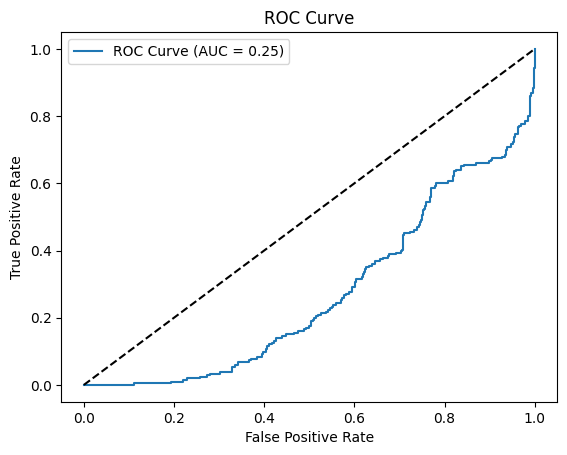

In [48]:
# Plot ROC Curve (jika binary atau multi-class)
fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), svm_model.predict_proba(X_test).ravel())
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

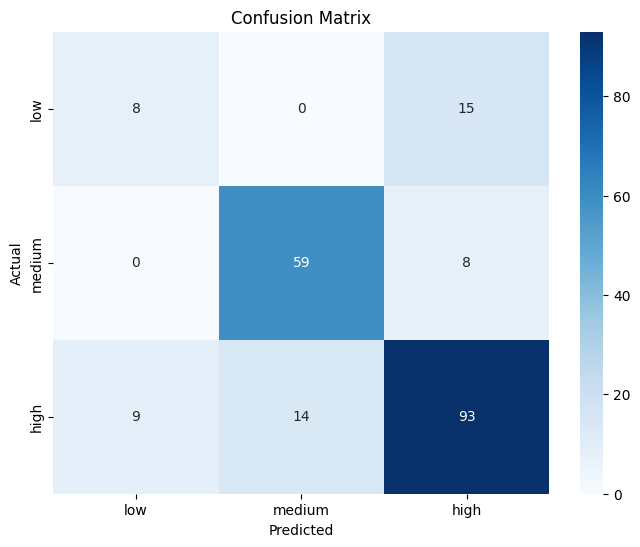

In [49]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()